#TODO URL dashboard:

# Perkenalan

Nama : Jason Rich Darmawan Onggo Putra

Batch : 016 RMT

# Identifikasi Masalah

## Topik Permasalahan

Perbandingan Pembelian Alkohol di Iowa, Amerika Serikat sebelum Pandemi Covid-19 dan puncak (kasus baru per hari) Pandemi Covid-19

Data sebelum Pandemi Covid-19 yang digunakan adalah bulan Janauri 2018.

Data Puncak Pandemi Covid-19 yang digunakan adalah bulan Januari 2021.

## Problem Statement

Membuktikan Dampak (Meningkat/Berkurang/Tidak Berdampak) Pandemi Covid-19 terhadap Konsumsi Alkohol di Iowa, Amerika Serikat.

## Latar Belakang

Sebagai Data Analyst yang mungkin akan bekerja di e-commerce atau franchisor convenience store, saya perlu intuisi untuk "apa perlu menambah stok minuman beralkohol ketika terjadi krisis seperti Pandemi Covid-19"

## Penjabaran Masalah

#TODO penjabaran masalah

### Hypothesis Testing 1

- [ ] Apa rata-rata penjualan minuman beralkohol (dalam volume / column `volume_sold_liters`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021 sama/berbeda (lebih kecil/lebih besar)?
- [ ] Apa rata-rata penjualan minuman beralkohol (dalam total harga / column `sale_dollars`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021 sama/berbeda?

### Visualisasi

- [ ] Di kota (column `city`) mana penjualan tertinggi (dalam volume / column `volume_sold_liters`) minuman beralkohol di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021?
- [ ] Di kota (column `city`) mana penjualan tertinggi (dalam total harga / column `sale_dollars`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021?

### Hypothesis Testing 2

- [ ] Apa rata-rata harga minuman beralkohol (column `state_bottle_retail`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021 sama/berbeda?

### Dugaan Penyebab Perbedaan Rata-rata Penjualan Minuman Beralkohol pada bulan Januari 2018 dan 2021

- [ ] Apa korelasi harga minimuman beralkohol (column `state_bottle_retail`) dengan jumlah botol terjual (column `bottles_sold`) di Iowa Amerika Serikat pada bulan Januari 2018 dan 2021?
- [ ] Apa minuman beralkohol dijual (column `state_bottle_retail`) dibawah biaya produksi (`state_bottle_cost`) di Iowa Amerika Serikat pada bulan Januari 2018 dan 2021?

### Informasi Lainnya

- [ ] Apa ukuran botol (column `bottle_volume_ml`) yang paling banyak terjual (column `bottles_sold`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021?
- [ ] Apa kategori minuman beralkohol yang paling banyak terjual (column `bottles_sold`) di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021?

# Data Loading

## Import Library

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

## Reference

project: bigquery-public-data

dataset: iowa_liquor_sales

table: sales

## Query

advantage: sub-query agar lebih clean dan lebih mudah ganti tahun dan bulan.

disadvantage: result sub-query-nya boros (diload hanya untuk difilter di query berikutnya).

```
SELECT *,
FROM (
  SELECT *, 
         EXTRACT(YEAR FROM date) as year,
         EXTRACT(MONTH FROM date) as month
  FROM `bigquery-public-data.iowa_liquor_sales.sales`
  WHERE date BETWEEN "2018-01-01" AND "2022-01-31"
)
WHERE year IN (2018, 2022) 
 AND month=1
```

In [2]:
df = pd.read_csv("./bigquery-public-data_iowa_liquor_sales_year_2018_and_year_2022_month_1.csv")

## DataFrame.head()

#TODO drop columns
- [x] can't be visualized nor answer 'Penjabaran Masalah'
  `store_number`, `store_name`, `address`, `store_location`, `vendor_number`, `vendor_name`, `item_number`, `item_description`
- too big to derive conclusion from
  `county_number`, `county`
- duplicated columns
  `volume_sold_gallons`

#TODO DataFrame.sort_values() 
- [x] by column `date`

In [3]:
pd.options.display.max_columns = None
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month
0,INV-10095200050,2018-01-30,4167,"Iowa Street Market, Inc.",1256 Iowa St,Dubuque,52001.0,POINT (-90.668138 42.504959),31.0,DUBUQUE,1092100.0,Imported Distilled Spirit Specialty,55.0,SAZERAC NORTH AMERICA,76227,Montezuma Blue,12,1000,4.66,6.99,60,419.40,60.00,15.85,2018,1
1,INV-09780600017,2018-01-15,4669,Vom Fass / Des Moines,"833, 42nd St",Des Moines,50312.0,POINT (-93.674384 41.59343100000001),77.0,POLK,1901200.0,Special Order Items,885.0,YAHARA BAY DISTILLERS INC,905081,Yahara Bay Apple Crisp(Apple Pie),6,200,7.98,11.97,6,71.82,1.20,0.32,2018,1
2,INV-43674300036,2022-01-11,4843,Stewart Road Fast Break,2418 Stewart Rd,Muscatine,52761.0,POINT (-91.072733 41.390826),70.0,MUSCATINE,1091300.0,Neutral Grain Spirits Flavored,346.0,OLE SMOKY DISTILLERY LLC,86739,Ole Smoky Apple Pie Moonshine 70prf Mini,8,50,8.75,13.13,3,39.39,0.15,0.03,2022,1
3,INV-43538900011,2022-01-05,5750,Casey's General Store #2920 / Ankeny,1010 SE National Dr,Ankeny,50021.0,POINT (-93.582179 41.70486400000001),77.0,POLK,1091300.0,Neutral Grain Spirits Flavored,346.0,OLE SMOKY DISTILLERY LLC,986845,SOOH Ole Smoky Blackberry Moonshine Mini,8,50,8.75,13.13,4,52.52,0.20,0.05,2022,1
4,INV-43515200004,2022-01-04,9047,Revelton Distilling Company,1400 W Clay St,Osceola,50213.0,POINT (-93.787233 41.041472),20.0,CLARKE,1011700.0,Corn Whiskies,654.0,Revelton Distilling Company,26294,Revelton Shine White Whiskey Mini,6,50,14.40,21.60,6,129.60,0.30,0.07,2022,1


In [4]:
# Is column invoice_and_item_number value unique?
df.loc[df['invoice_and_item_number'].map(df['invoice_and_item_number'].value_counts()) > 1]
# alternative method:
# df.loc[df['invoice_and_item_number'].duplicated()]

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,year,month


## DataFrame.columns

In [5]:
df.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county', 'category', 'category_name', 'vendor_number', 'vendor_name',
       'item_number', 'item_description', 'pack', 'bottle_volume_ml',
       'state_bottle_cost', 'state_bottle_retail', 'bottles_sold',
       'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons', 'year',
       'month'],
      dtype='object')

## Column `category_name` Values

In [6]:
df['category'].value_counts().index

Float64Index([1031100.0, 1012100.0, 1011200.0, 1081600.0, 1062400.0, 1031200.0,
              1011100.0, 1081400.0, 1051100.0, 1032100.0, 1022200.0, 1011400.0,
              1081200.0, 1081300.0, 1071100.0, 1062200.0, 1062500.0, 1082000.0,
              1022100.0, 1032200.0, 1082200.0, 1041100.0, 1012200.0, 1052100.0,
              1701100.0, 1012400.0, 1042100.0, 1012300.0, 1011600.0, 1081100.0,
              1062100.0, 1091300.0, 1062300.0, 1081500.0, 1091100.0, 1011300.0,
              1091200.0, 1011500.0, 1901200.0, 1092100.0, 1082100.0, 1011700.0,
              1700000.0, 1041200.0, 1022300.0, 1041300.0, 1091400.0, 1031000.0,
              1090000.0, 1091000.0, 1092000.0, 1042000.0, 1032000.0, 1070000.0,
              1081000.0],
             dtype='float64')

## Column `city` Values

In [7]:
df['city'].value_counts().index

Index(['Des Moines', 'Cedar Rapids', 'Davenport', 'Waterloo', 'Sioux City',
       'West Des Moines', 'Ames', 'Council Bluffs', 'Dubuque', 'Iowa City',
       ...
       'Casey', 'Roland', 'Ossian', 'Melbourne', 'Bussey', 'Stanwood',
       'Fontanelle', 'Blairstown', 'Earling', 'Colorado Springs'],
      dtype='object', length=444)

## Column `bottle_volume_ml` Values

In [8]:
df['bottle_volume_ml'].value_counts().index.sort_values()

Int64Index([  20,   50,  100,  200,  300,  375,  400,  500,  600,  700,  750,
             800,  850,  900,  950, 1000, 1200, 1750, 1800, 1950, 2250, 2400,
            3000, 3500, 4500, 5250, 6000],
           dtype='int64')

## DataFrame.describe()

#TODO detecting and treating outliers on columns

- [x] year 2018
  - columns 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters'
- [x] year 2022
  - columns 'pack', 'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters'

In [9]:
def calculateLowerLimitUpperLimit(series: pd.Series):
    skew = series.skew()

    # extreme skewed distribution
    if skew < -1 or skew > 1:
        q1, q3 = series.quantile([.25,.75])
        iqr = q3 - q1
        return q1 - iqr * 3, q3 + iqr * 3
        
    # skewed distribution
    elif skew < -0.5 or skew > 0.5:
        q1, q3 = series.quantile([.25,.75])
        iqr = q3 - q1
        return q1 - iqr * 1.5, q3 + iqr * 1.5

    # normal distribution
    else:
        mean, std = series.agg(['mean', 'std'])
        return mean - 3 * std, mean + 3 * std

for year in [2018, 2022]:
    for index, value in df.loc[(df['year'] == year) & (df['month'] == 1), 
                               ['pack', 'bottle_volume_ml', 'state_bottle_cost', 
                                'state_bottle_retail', 'bottles_sold', 'sale_dollars', 
                                'volume_sold_liters']] \
                          .items():
        lowerLimit, upperLimit = calculateLowerLimitUpperLimit(value)

        min, max = value.agg(['min', 'max'])
        if lowerLimit > min or upperLimit < max:
            print("year {0}, column {1}, lower limit {2}, min {3}, upper limit {4}, max {5}" \
                    .format(year, index, lowerLimit, min, upperLimit, max))

year 2018, column pack, lower limit -12.0, min 1, upper limit 30.0, max 48
year 2018, column bottle_volume_ml, lower limit 0.0, min 50, upper limit 1750.0, max 6000
year 2018, column state_bottle_cost, lower limit -15.069999999999997, min 0.89, upper limit 32.879999999999995, max 1599.19
year 2018, column state_bottle_retail, lower limit -22.619999999999997, min 1.34, upper limit 49.339999999999996, max 2398.79
year 2018, column bottles_sold, lower limit -28.0, min 1, upper limit 42.0, max 1980
year 2018, column sale_dollars, lower limit -285.0, min 0.0, upper limit 450.0, max 36154.8
year 2018, column volume_sold_liters, lower limit -25.5, min 0.05, upper limit 37.5, max 2100.0
year 2022, column pack, lower limit -12.0, min 1, upper limit 30.0, max 60
year 2022, column bottle_volume_ml, lower limit -562.5, min 20, upper limit 1937.5, max 5250
year 2022, column state_bottle_cost, lower limit -18.28, min 0.89, upper limit 38.21, max 1949.02
year 2022, column state_bottle_retail, lower l

## DataFrame.info()

#TODO handle null rows on columns

range index: 373231 entries
- [x] remove null due to categorical data
  - `city`            372256
  - `zip_code`        372256
  - `category`        373094
  - `category_name`   373094

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373231 entries, 0 to 373230
Data columns (total 26 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  373231 non-null  object 
 1   date                     373231 non-null  object 
 2   store_number             373231 non-null  int64  
 3   store_name               373231 non-null  object 
 4   address                  372256 non-null  object 
 5   city                     372256 non-null  object 
 6   zip_code                 372256 non-null  float64
 7   store_location           335493 non-null  object 
 8   county_number            372254 non-null  float64
 9   county                   372256 non-null  object 
 10  category                 373094 non-null  float64
 11  category_name            373094 non-null  object 
 12  vendor_number            373231 non-null  float64
 13  vendor_name              373231 non-null  object 
 14  item

# Data Cleaning

In [11]:
df2 = df.sort_values('date').reset_index(drop=True).copy()

In [12]:
df3 = df2.drop(['store_number', 'store_name', 'address', 'store_location', 
                'vendor_number', 'vendor_name', 'item_number', 'item_description', 
                'county_number', 'county', 'volume_sold_gallons'], 
                axis='columns') \
         .copy()

## Outliers Detection and Treatment

In [13]:
def detectOutliers(series: pd.Series):
    lowerLimit, upperLimit = calculateLowerLimitUpperLimit(series)
    outliersPercentage = len(series.loc[(series < lowerLimit) | (series > upperLimit)]) \
                        / len(series)
    print("year {0}, column {1}, skew {2:.2f}, outliers percentage {3:.2f}%".format(year, series.name, series.skew(), outliersPercentage * 100))
    print("lower limit {0[0]}, upper limit {0[1]}".format(calculateLowerLimitUpperLimit(series)))
    display(series.value_counts().sort_index(ascending=False))

- [x] year 2018
  - natural outliers
    - under 5%
      - 'pack', 'bottle_volume'
  - not natural outliers
    - under 5%
      - 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters'
- [x] year 2022
  - natural outliers
    - under 5%
      - 'pack', 'bottle_volume_ml'
  - not natural outliers
    - under 5%
      - 'state_bottle_cost', 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters'

In [14]:
for year in [2018, 2022]:
    for index, value in df3.loc[(df3['year'] == year) & (df3['month'] == 1), 
                                ['pack', 'bottle_volume_ml', 'state_bottle_cost', 
                                 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 
                                 'volume_sold_liters']] \
                           .items():
        detectOutliers(value)

year 2018, column pack, skew 2.71, outliers percentage 3.02%
lower limit -12.0, upper limit 30.0


48      5318
44       438
24     19538
20         1
15        34
12    109625
10      4312
8        112
6      48771
5        399
4        246
3        151
2          1
1       1690
Name: pack, dtype: int64

year 2018, column bottle_volume_ml, skew 1.29, outliers percentage 0.94%
lower limit 0.0, upper limit 1750.0


6000       16
3500       21
3000     1643
2400       80
2250        3
1950        8
1800       12
1750    35698
1200      172
1000    24205
900         2
850         2
800       175
750     84797
600      3197
500      9092
400        34
375     21225
300      1301
200      7311
100      1359
50        283
Name: bottle_volume_ml, dtype: int64

year 2018, column state_bottle_cost, skew 66.67, outliers percentage 0.75%
lower limit -15.069999999999997, upper limit 32.879999999999995


1599.19      3
419.99       1
390.00       7
314.99       2
262.46       3
          ... 
1.12         1
1.00        98
0.97        73
0.90       740
0.89       158
Name: state_bottle_cost, Length: 837, dtype: int64

year 2018, column state_bottle_retail, skew 66.67, outliers percentage 0.75%
lower limit -22.619999999999997, upper limit 49.339999999999996


2398.79      3
629.99       1
585.00       7
472.49       2
393.69       3
          ... 
1.68         1
1.50        98
1.46        73
1.35       740
1.34       158
Name: state_bottle_retail, Length: 838, dtype: int64

year 2018, column bottles_sold, skew 21.18, outliers percentage 2.88%
lower limit -28.0, upper limit 42.0


1980        1
1320        1
1200        1
960         1
900         3
        ...  
5        2573
4       10183
3       19603
2       28011
1       23132
Name: bottles_sold, Length: 110, dtype: int64

year 2018, column sale_dollars, skew 30.04, outliers percentage 2.53%
lower limit -285.0, upper limit 450.0


36154.80     1
20498.40     1
18816.00     1
17529.60     1
17496.00     1
            ..
1.70         9
1.50         3
1.46         4
1.35         6
0.00        79
Name: sale_dollars, Length: 4797, dtype: int64

year 2018, column volume_sold_liters, skew 31.56, outliers percentage 1.59%
lower limit -25.5, upper limit 37.5


2100.00      1
1980.00      1
1417.50      1
1320.00      1
1260.00      1
          ... 
0.25         3
0.20       442
0.15        12
0.10        73
0.05       158
Name: volume_sold_liters, Length: 212, dtype: int64

year 2022, column pack, skew 2.73, outliers percentage 2.72%
lower limit -12.0, upper limit 30.0


60       18
48     4575
44      369
30        6
28        1
24    17167
20        3
15       20
12    95173
10     3788
9        33
8      1525
6     56455
5       203
4       454
3       297
1      2508
Name: pack, dtype: int64

year 2022, column bottle_volume_ml, skew 0.64, outliers percentage 0.08%
lower limit -562.5, upper limit 1937.5


5250        1
4500       26
3500       24
2400       52
2250       35
1800       95
1750    33970
1200       22
1000    17199
950        14
900        39
850         4
800        88
750     83668
700         1
600        16
375     20221
200      5568
100      2464
50      19058
20         30
Name: bottle_volume_ml, dtype: int64

year 2022, column state_bottle_cost, skew 35.20, outliers percentage 1.60%
lower limit -18.28, upper limit 38.21


1949.02       1
228.66        1
200.00       12
175.27       16
150.00        2
           ... 
1.13        559
1.00        129
0.95        245
0.90       1316
0.89        211
Name: state_bottle_cost, Length: 764, dtype: int64

year 2022, column state_bottle_retail, skew 35.20, outliers percentage 1.60%
lower limit -27.4, upper limit 57.3


2923.53       1
342.99        1
300.00       12
262.91       16
225.00        2
           ... 
1.70        559
1.50        129
1.43        245
1.35       1316
1.34        211
Name: state_bottle_retail, Length: 765, dtype: int64

year 2022, column bottles_sold, skew 189.68, outliers percentage 4.00%
lower limit -24.0, upper limit 39.0


13200        1
2430         1
2304         1
2100         1
1536         1
         ...  
5         2460
4         9598
3        15259
2        20094
1        19262
Name: bottles_sold, Length: 136, dtype: int64

year 2022, column sale_dollars, skew 239.69, outliers percentage 2.94%
lower limit -321.24, upper limit 526.32


250932.00     1
30399.30      1
27181.44      2
26271.00      1
25067.52      1
             ..
1.80          1
1.70         10
1.50          1
1.35          7
1.34          3
Name: sale_dollars, Length: 4579, dtype: int64

year 2022, column volume_sold_liters, skew 167.35, outliers percentage 2.36%
lower limit -22.799999999999997, upper limit 33.9


13200.00       1
4252.50        1
4032.00        1
3675.00        1
2688.00        1
            ... 
0.08           1
0.06           2
0.05        6378
0.04           8
0.02           6
Name: volume_sold_liters, Length: 266, dtype: int64

### Ask Instructor

#TODO ask instructor

reference: https://www.quora.com/Is-it-bad-to-delete-statistical-outliers

- [x] Is it true in Machine Learning, it is always a requirement to remove the outliers? If so, should we remove natural outliers or do mean/median imputation in column `bottle_volume_ml`?
  - do not alter natural outliers.

In [15]:
df4 = df3.copy()

# outliers percentage under 5% and not natural outliers
for year in [2018, 2022]:
    #WARNING: do not edit the DataFrame per column. 
    # gather all outliers index. Then drop it with one move.
    index = pd.Index([])
    for column in ['state_bottle_cost', 'state_bottle_retail', 
                  'bottles_sold', 'sale_dollars', 'volume_sold_liters']:
        value = df4.loc[(df4['year'] == year) & (df4['month'] == 1), column]
        lowerLimit, upperLimit = calculateLowerLimitUpperLimit(value)
        index = index.append(value[(value < lowerLimit) | (value > upperLimit)].index)
    df4 = df4.drop(index)

### Ask Instructor

#TODO ask instructor
- [x] after 1st outliers treatment, what should we do if the outliers percentage still above 0.3%?
  - it's okay.

In [16]:
for year in [2018, 2022]:
    for index, value in df4.loc[(df4['year'] == year) & (df4['month'] == 1), 
                                ['pack', 'bottle_volume_ml', 'state_bottle_cost', 
                                 'state_bottle_retail', 'bottles_sold', 'sale_dollars', 
                                 'volume_sold_liters']] \
                           .items():
        detectOutliers(value)

year 2018, column pack, skew 2.66, outliers percentage 1.80%
lower limit -12.0, upper limit 30.0


48      2892
44       369
24     18885
20         1
15        31
12    105914
10      4304
8         68
6      45950
5        399
4        231
3         80
1       1616
Name: pack, dtype: int64

year 2018, column bottle_volume_ml, skew 1.27, outliers percentage 0.95%
lower limit 0.0, upper limit 1750.0


3500       15
3000     1607
2400       71
2250        3
1950        7
1800       12
1750    33913
1200      128
1000    22022
900         2
850         2
800       174
750     82327
600      3193
500      9082
400        31
375     20598
300      1297
200      5711
100       263
50        282
Name: bottle_volume_ml, dtype: int64

year 2018, column state_bottle_cost, skew 1.45, outliers percentage 0.53%
lower limit -13.880000000000003, upper limit 31.340000000000003


32.67      1
32.66      1
32.51     37
32.50     92
32.49     49
        ... 
1.13     281
1.00      19
0.97      16
0.90      35
0.89      35
Name: state_bottle_cost, Length: 721, dtype: int64

year 2018, column state_bottle_retail, skew 1.45, outliers percentage 0.53%
lower limit -20.820000000000004, upper limit 47.010000000000005


49.01      1
48.99      1
48.77     37
48.75     92
48.74     49
        ... 
1.70     281
1.50      19
1.46      16
1.35      35
1.34      35
Name: state_bottle_retail, Length: 722, dtype: int64

year 2018, column bottles_sold, skew 1.44, outliers percentage 0.00%
lower limit -28.0, upper limit 42.0


40        6
36      536
35        1
34        1
31        1
30        9
27        1
25        3
24     9612
22        2
21        2
20       64
19        1
18      867
17        4
16       43
15       71
14       18
13        6
12    48036
11       16
10     1530
9       148
8      1084
7       297
6     36054
5      2572
4     10153
3     19484
2     27629
1     22489
Name: bottles_sold, dtype: int64

year 2018, column sale_dollars, skew 1.49, outliers percentage 0.26%
lower limit -261.84, upper limit 416.88


450.00    99
449.88    25
449.76     7
447.12     1
446.04     2
          ..
1.70       9
1.50       3
1.46       4
1.35       6
0.00      79
Name: sale_dollars, Length: 3573, dtype: int64

year 2018, column volume_sold_liters, skew 1.47, outliers percentage 0.18%
lower limit -21.0, upper limit 31.5


36.00    324
33.25      1
31.50    797
30.00     45
27.00    186
        ... 
0.25       3
0.20     442
0.15      12
0.10      73
0.05     157
Name: volume_sold_liters, Length: 90, dtype: int64

year 2022, column pack, skew 2.49, outliers percentage 0.99%
lower limit -12.0, upper limit 30.0


60       10
48     1478
44      182
30        6
28        1
24    16335
20        2
15       20
12    91177
10     3776
9        33
8      1487
6     52947
5       203
4       333
3       167
1      1249
Name: pack, dtype: int64

year 2022, column bottle_volume_ml, skew 0.60, outliers percentage 32.13%
lower limit 375.0, upper limit 1375.0


3500       24
1750    32103
1000    15007
950        11
900        39
850         4
800        88
750     80362
700         1
600        14
375     19445
200      4035
100       500
50      17743
20         30
Name: bottle_volume_ml, dtype: int64

year 2022, column state_bottle_cost, skew 1.40, outliers percentage 0.20%
lower limit -16.5, upper limit 36.0


38.16      1
38.00    144
37.50    130
36.83      5
36.57      1
        ... 
1.13     208
1.00      18
0.95      30
0.90      50
0.89      23
Name: state_bottle_cost, Length: 656, dtype: int64

year 2022, column state_bottle_retail, skew 1.40, outliers percentage 0.20%
lower limit -24.75, upper limit 54.0


57.24      1
57.00    144
56.25    130
55.25      5
54.86      1
        ... 
1.70     208
1.50      18
1.43      30
1.35      50
1.34      23
Name: state_bottle_retail, Length: 657, dtype: int64

year 2022, column bottles_sold, skew 1.33, outliers percentage 0.00%
lower limit -24.0, upper limit 39.0


36      393
32       10
31        1
30       45
28        2
24    10795
23        3
22        4
21        3
20      115
19        3
18      967
17        5
16      107
15       69
14       22
13       10
12    47243
11       35
10     1861
9       152
8      1607
7       266
6     41407
5      2445
4      9508
3     15051
2     19681
1     17596
Name: bottles_sold, dtype: int64

year 2022, column sale_dollars, skew 1.38, outliers percentage 0.28%
lower limit -298.44000000000005, upper limit 488.22


522.48    11
522.00    20
521.76     3
519.84     1
513.72     1
          ..
1.80       1
1.70      10
1.50       1
1.35       7
1.34       3
Name: sale_dollars, Length: 3293, dtype: int64

year 2022, column volume_sold_liters, skew 1.24, outliers percentage 0.00%
lower limit -21.0, upper limit 31.5


31.50     739
27.00     223
24.00    1112
22.80       1
22.50      24
         ... 
0.08        1
0.06        2
0.05     5633
0.04        8
0.02        6
Name: volume_sold_liters, Length: 106, dtype: int64

## Null Treatment

### Ask Instructor

#TODO ask instructor

- [x] should we remove rows based on condition (a column with categorical data is null)?
  - it's okay to drop it.

In [17]:
for index, value in df4.loc[:,['city','zip_code','category','category_name']].items():
    print("column {0}, null percentage {1:.2f}%".format(index, len(value.loc[value.isna()]) / len(value) * 100))

column city, null percentage 0.25%
column zip_code, null percentage 0.25%
column category, null percentage 0.03%
column category_name, null percentage 0.03%


In [18]:
df5 = df4.copy()

# categorical data, we will drop them.
for index, value in df5.loc[:, ['city', 'zip_code', 'category', 'category_name']].items():
    df5 = df5.drop(df5.loc[value.isna()].index)

In [19]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 349153 entries, 0 to 373229
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  349153 non-null  object 
 1   date                     349153 non-null  object 
 2   city                     349153 non-null  object 
 3   zip_code                 349153 non-null  float64
 4   category                 349153 non-null  float64
 5   category_name            349153 non-null  object 
 6   pack                     349153 non-null  int64  
 7   bottle_volume_ml         349153 non-null  int64  
 8   state_bottle_cost        349153 non-null  float64
 9   state_bottle_retail      349153 non-null  float64
 10  bottles_sold             349153 non-null  int64  
 11  sale_dollars             349153 non-null  float64
 12  volume_sold_liters       349153 non-null  float64
 13  year                     349153 non-null  int64  
 14  mont

In [20]:
df6 = df5.reset_index()

# Analisis dan Perhitungan

## Visualisasi Data

### Di kota (column `city`) mana penjualan tertinggi (dalam volume / column `volume_sold_liters`, dalam total harga / column `sale_dollars`) minuman beralkohol di Iowa, Amerika Serikat pada bulan Januari 2018 dan 2021?

In [32]:
df6_volume_sold_liters_city_other = df6.groupby('city')['volume_sold_liters'] \
                    .sum() \
                    .sort_values(ascending=False).index[5:]

df6_volume_sold_liters_city = df6.replace(df6_volume_sold_liters_city_other, 'Other') \
              .groupby('city')['volume_sold_liters'] \
              .sum()

df6_sale_dollars_city_other = df6.groupby('city')['sale_dollars'] \
                    .sum() \
                    .sort_values(ascending=False).index[5:]

df6_sale_dollars_city = df6.replace(df6_sale_dollars_city_other, 'Other') \
              .groupby('city')['sale_dollars'] \
              .sum()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


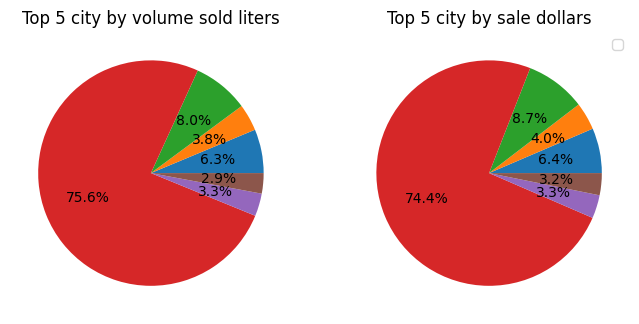

In [52]:
fig, ax = plt.subplots(ncols=2, figsize=(8,4))
ax[0].pie(df6_volume_sold_liters_city, autopct="%.1f%%")
ax[0].set_title('Top 5 city by volume sold liters')

ax[1].pie(df6_sale_dollars_city, autopct="%.1f%%")
ax[1].set_title('Top 5 city by sale dollars')


<AxesSubplot: ylabel='volume_sold_liters'>

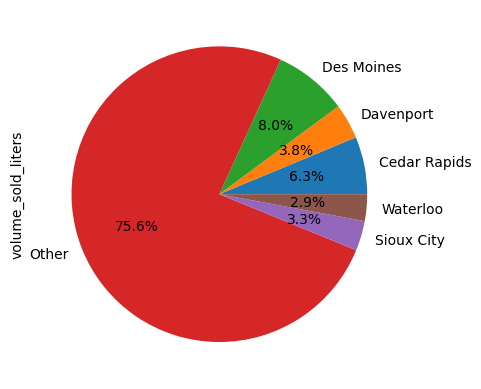

In [33]:

df6_volume_sold_liters_city.plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot: ylabel='sale_dollars'>

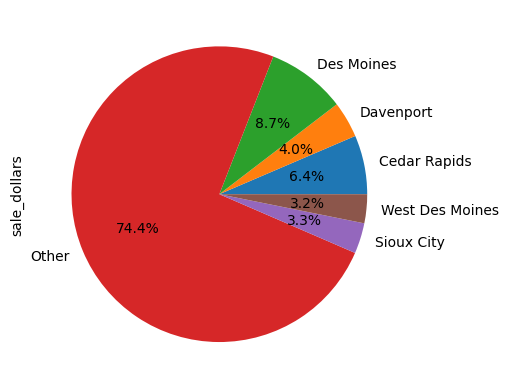

In [30]:
df6_sale_dollars_city.plot(kind='pie', autopct='%1.1f%%')

## Statistik Deskriptif

## Statistik Inferensial

# Pengambilan Keputusan